In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image preprocessing

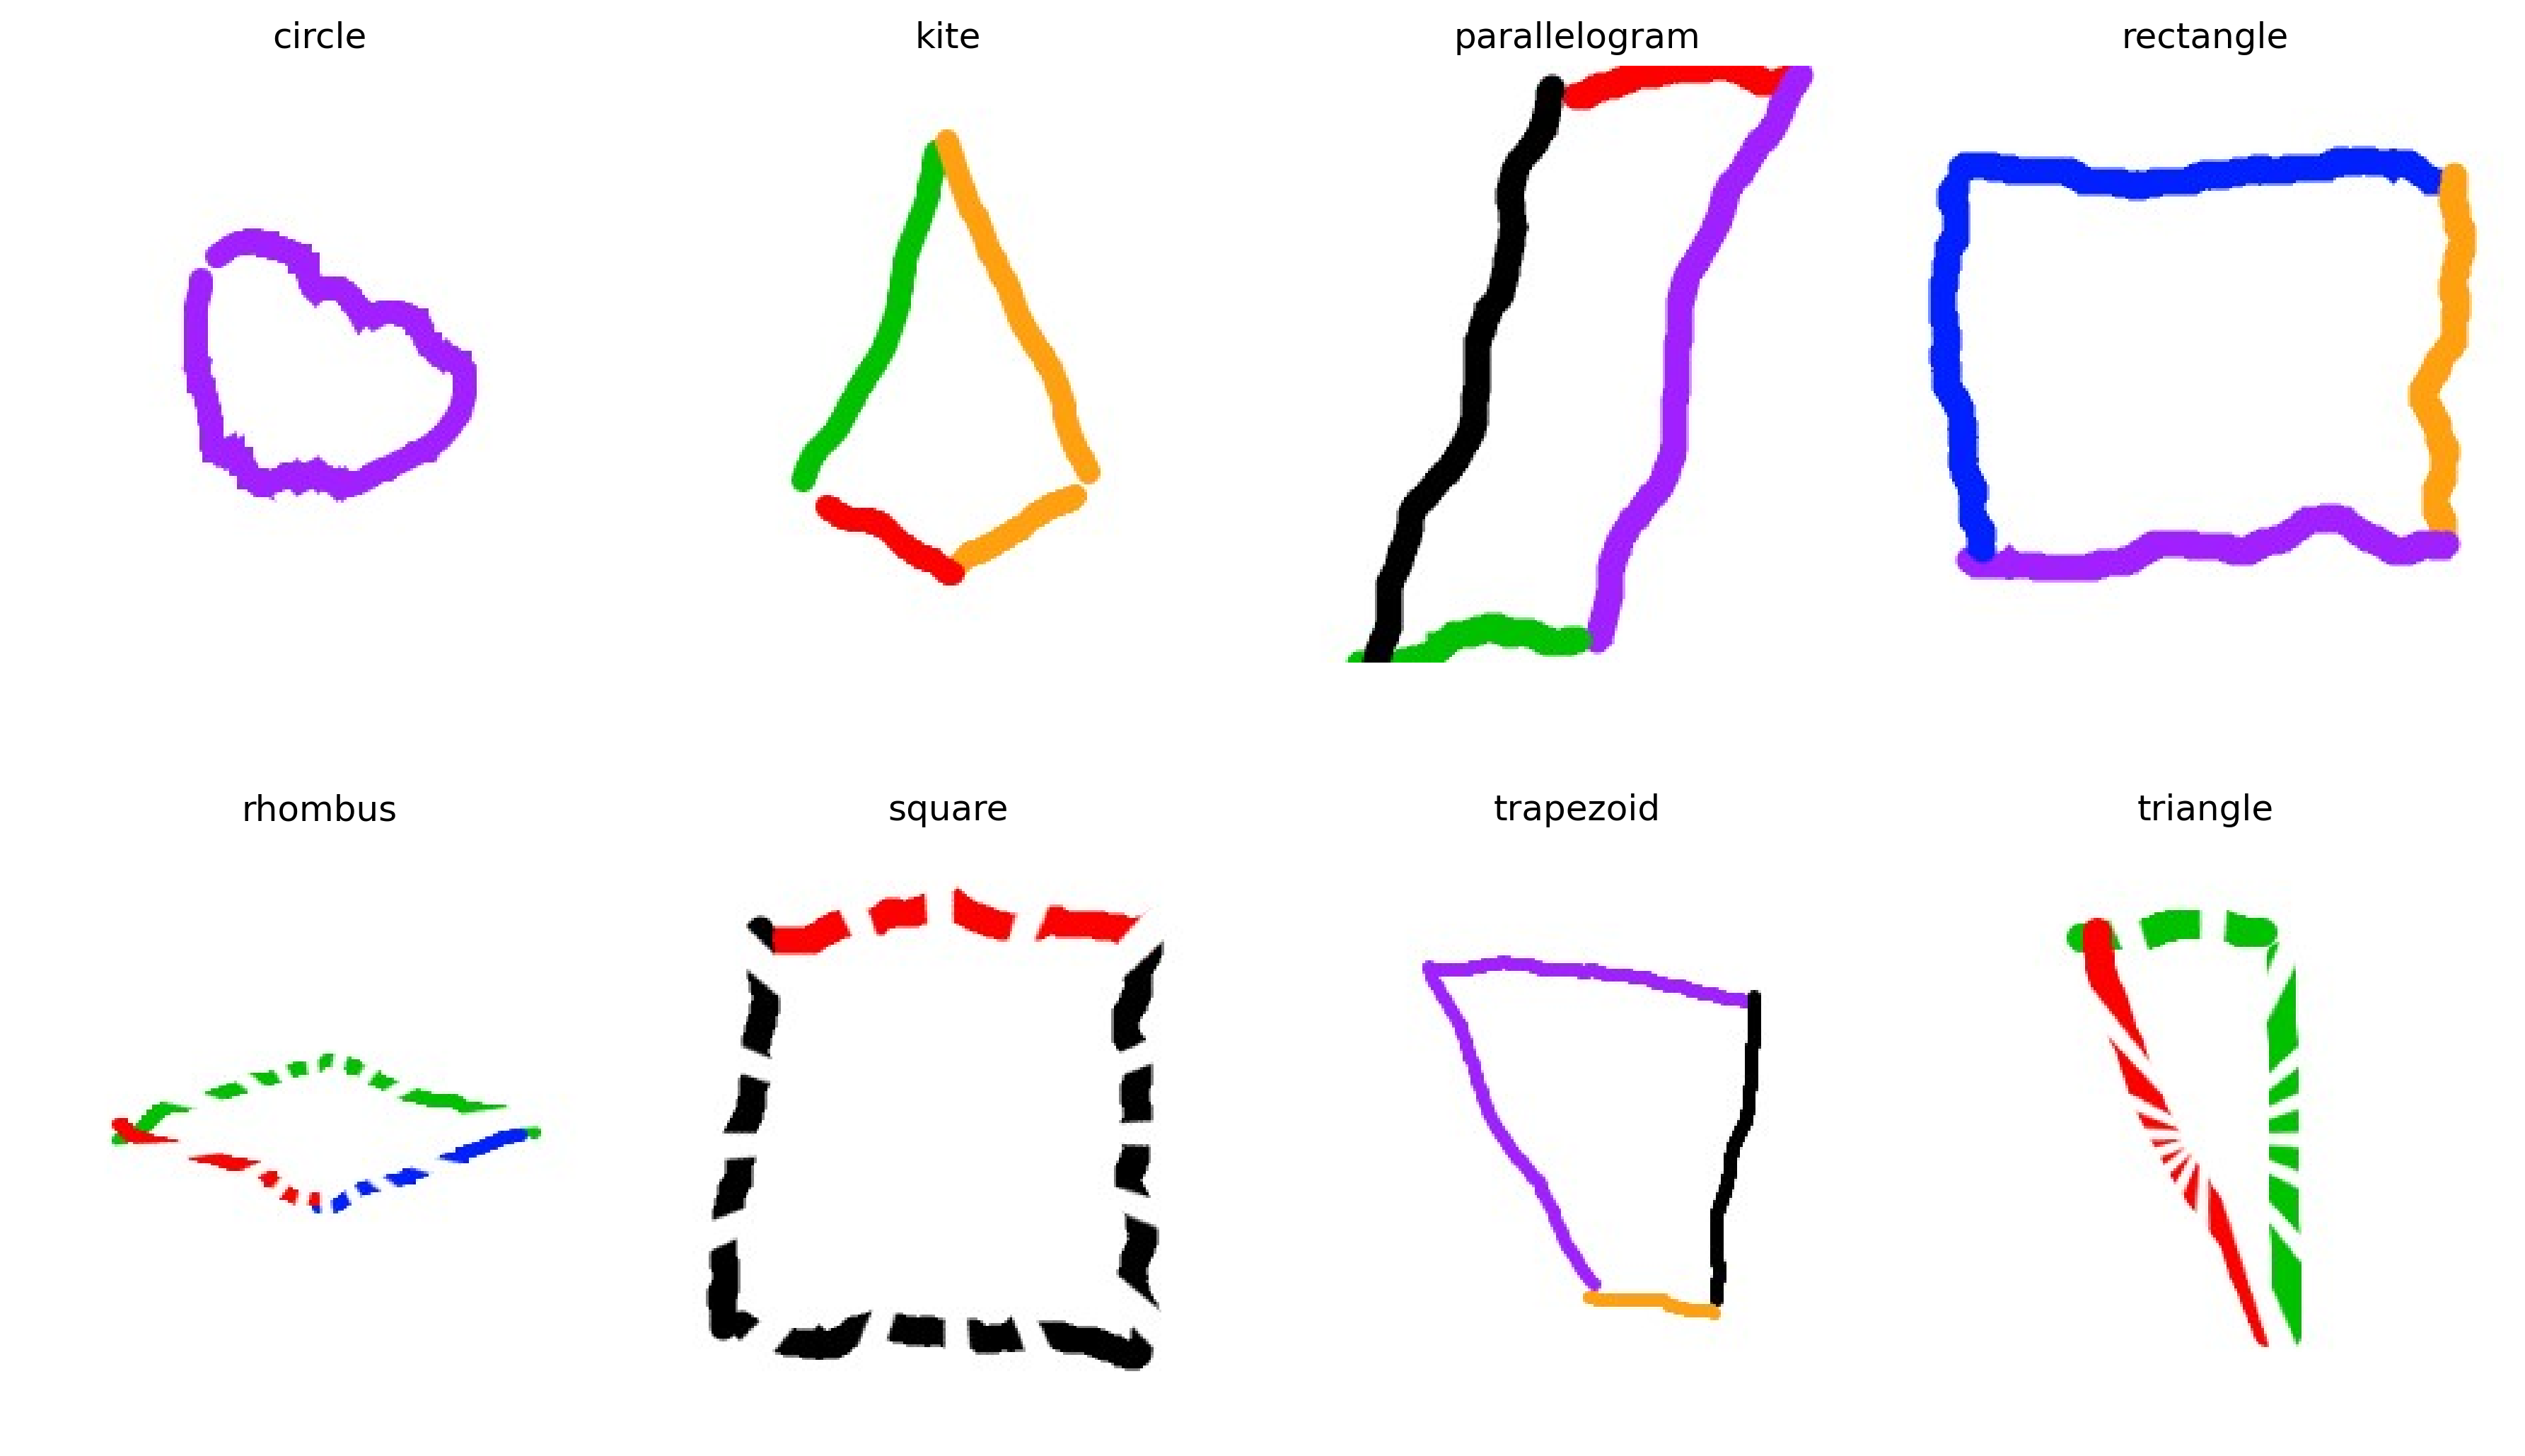

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the main folder path
main_folder = '/content/drive/MyDrive/Math symbol dataset'

# List all subfolders
subfolders = [os.path.join(main_folder, f) for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

# List to store one image from each folder and corresponding folder names
selected_images = []
folder_names = []

# Pick one random image from each subfolder
for folder in subfolders:
    images = [os.path.join(folder, img) for img in os.listdir(folder) if img.endswith(('png', 'jpg', 'jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(selected_image)
        folder_names.append(os.path.basename(folder))

# Load images
loaded_images = [Image.open(img) for img in selected_images]

# Set up the grid size (assuming 8 subfolders)
grid_size = (2, 4)  # 2 rows and 4 columns

# Create a figure with high DPI
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 8), dpi=300)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Display images in the grid and add folder names
for ax, img, folder_name in zip(axes, loaded_images, folder_names):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(folder_name, fontsize=12)

# Hide any remaining empty subplots
for ax in axes[len(loaded_images):]:
    ax.axis('off')

# Show the grid
plt.tight_layout()
plt.show()


# Results

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/content/drive/MyDrive/Math symbol dataset"


# Define the list of label folders in the dataset folder
label_folders = ["circle",
"kite",
"parallelogram",
"rectangle",
"rhombus",
"square",
"trapezoid",
"triangle"]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Create a dictionary to map label folders to numerical labels
label_mapping = {label: idx for idx, label in enumerate(label_folders)}

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)

    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its numerical label to the data and labels lists
        data.append(img)
        labels.append(label_mapping[label_folder])

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels, num_classes=len(label_folders))

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
label_mapping

Data shape: (20000, 128, 128, 3)
Labels shape: (20000,)


{'circle': 0,
 'kite': 1,
 'parallelogram': 2,
 'rectangle': 3,
 'rhombus': 4,
 'square': 5,
 'trapezoid': 6,
 'triangle': 7}

In [ ]:
calabels = to_categorical(labels, num_classes=len(label_folders))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,calabels, test_size = 0.2,random_state=0,shuffle=True)

# CNN results

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_simple_neural_network(input_shape, num_classes):
    model = models.Sequential()

    # Add a simple convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    # Flatten the output and add a dense layer
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Example input shape (adjust based on your image dimensions and channels)
input_shape = (128, 128, 3)

# Example number of classes (adjust based on your dataset)
num_classes = 8

# Create the simplified neural network model
simple_neural_network = create_simple_neural_network(input_shape, num_classes)

# Display the model summary
simple_neural_network.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 flatten_3 (Flatten)         (None, 508032)            0         
                                                                 
 dense_3 (Dense)             (None, 8)                 4064264   
                                                                 
Total params: 4065160 (15.51 MB)
Trainable params: 4065160 (15.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
simple_neural_network.compile(optimizer='adam',loss='categorical_crossentropy',
                 metrics=['accuracy'])


In [ ]:
history=simple_neural_network.fit(X_train, Y_train, epochs=10,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 150s 373ms/step - loss: 1107.5164 - accuracy: 0.4257 - val_loss: 10.5494 - val_accuracy: 0.5328
Epoch 2/10
400/400 [==============================] - 158s 395ms/step - loss: 3.1392 - accuracy: 0.7955 - val_loss: 10.7725 - val_accuracy: 0.5719
Epoch 3/10
400/400 [==============================] - 149s 373ms/step - loss: 1.4565 - accuracy: 0.8938 - val_loss: 12.5522 - val_accuracy: 0.5791
Epoch 4/10
400/400 [==============================] - 136s 341ms/step - loss: 1.1689 - accuracy: 0.9191 - val_loss: 15.1048 - val_accuracy: 0.5672
Epoch 5/10
400/400 [==============================] - 144s 361ms/step - loss: 1.0561 - accuracy: 0.9330 - val_loss: 15.8294 - val_accuracy: 0.5834
Epoch 6/10
400/400 [==============================] - 155s 387ms/step - loss: 1.1129 - accuracy: 0.9327 - val_loss: 16.8044 - val_accuracy: 0.5869
Epoch 7/10
400/400 [==============================] - 161s 403ms/step - loss: 1.0648 - accuracy: 0.9425 - val_loss:

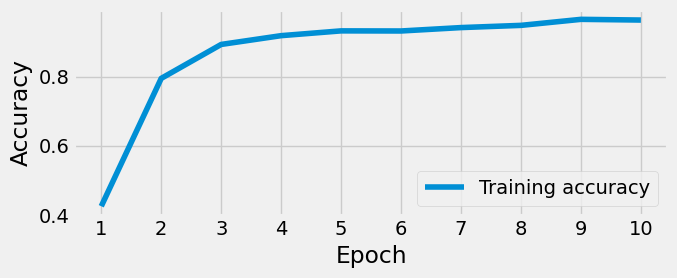

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

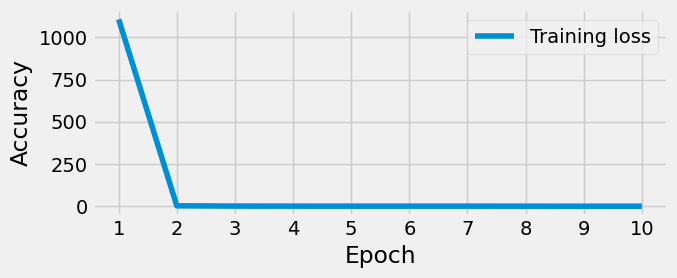

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
simple_neural_network.evaluate(X_test,Y_test)

125/125 [==============================] - 18s 141ms/step - loss: 20.8114 - accuracy: 0.5820


[20.81135368347168, 0.5820000171661377]

In [ ]:
pred= simple_neural_network.predict(X_test)
ypred=pred.argmax(axis=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test.argmax(axis=1),ypred))
cf_matrix=confusion_matrix(Y_test.argmax(axis=1),ypred)
cf_matrix

125/125 [==============================] - 14s 110ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       507
           1       0.73      0.70      0.72       470
           2       0.43      0.43      0.43       520
           3       0.58      0.60      0.59       497
           4       0.80      0.89      0.84       496
           5       0.58      0.57      0.58       490
           6       0.31      0.29      0.30       522
           7       0.52      0.54      0.53       498

    accuracy                           0.58      4000
   macro avg       0.58      0.59      0.58      4000
weighted avg       0.58      0.58      0.58      4000



array([[336,  21,  24,  29,  38,  16,  36,   7],
       [ 28, 329,  33,  12,  32,   1,  12,  23],
       [ 19,  25, 225,  40,  19,  30,  94,  68],
       [ 12,  12,  17, 297,   1,  40,  71,  47],
       [ 15,  30,   9,   0, 440,   0,   1,   1],
       [ 24,   1,  32,  41,   2, 278,  81,  31],
       [ 20,   8, 118,  59,   9,  79, 152,  77],
       [ 10,  22,  70,  37,  12,  32,  44, 271]])

# Novel

In [8]:

import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (128, 128,3)


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(600, activation= 'sigmoid'),
])

model.build(input_shape=input_shape)

In [9]:
features_train = model.predict(data)

625/625 [==============================] - 172s 274ms/step


In [10]:
import pandas as pd
df1=pd.DataFrame(features_train)
# df1=pd.read_csv('/content/drive/MyDrive/childvggfeatures.csv')
df1['label']=labels
df1

0             1         2    3             4             5  \
0      2.021455e-11  4.150264e-30  0.009319  0.0  3.777575e-06  3.260363e-16   
1      6.928690e-19  0.000000e+00  0.999920  0.0  4.656962e-06  6.533850e-20   
2      2.926348e-11  3.181289e-32  1.000000  0.0  1.169993e-11  1.519305e-26   
3      1.357096e-04  1.075216e-22  0.747538  0.0  2.437788e-10  8.199822e-19   
4      5.597531e-20  0.000000e+00  0.946221  0.0  8.634865e-01  9.564087e-29   
...             ...           ...       ...  ...           ...           ...   
19995  2.612221e-16  0.000000e+00  1.000000  0.0  3.456509e-07  7.277199e-28   
19996  2.752690e-08  7.050550e-38  0.999986  0.0  2.933377e-05  1.128664e-26   
19997  6.297229e-01  2.057685e-35  1.000000  0.0  1.754335e-07  1.805199e-31   
19998  5.481265e-15  1.045616e-29  1.000000  0.0  2.947027e-08  2.929007e-26   
19999  5.512465e-08  0.000000e+00  1.000000  0.0  8.964270e-01  2.615541e-24   

         6             7         8             9  ...  591           592  \
0      1.0  1.121886e-11  1.000000  3.457422e-02  ...  1.0  1.831079e-35   
1      1.0  6.163267e-23  1.000000  1.000000e+00  ...  1.0  4.895187e-31   
2      1.0  7.122061e-20  0.999994  9.999999e-01  ...  1.0  9.484587e-15   
3      1.0  1.169486e-20  1.000000  9.998410e-01  ...  1.0  0.000000e+00   
4      1.0  6.013171e-24  1.000000  9.550030e-01  ...  1.0  1.145374e-29   
...    ...           ...       ...           ...  ...  ...           ...   
19995  1.0  4.995377e-30  1.000000  9.994062e-01  ...  1.0  8.106910e-29   
19996  1.0  2.445219e-22  1.000000  1.000000e+00  ...  1.0  3.538535e-17   
19997  1.0  8.143236e-10  1.000000  1.000000e+00  ...  1.0  1.062197e-01   
19998  1.0  2.967619e-13  1.000000  1.069170e-08  ...  1.0  2.868616e-29   
19999  1.0  4.019413e-23  0.999976  1.051645e-11  ...  1.0  2.174730e-24   

                593           594  595           596  597           598  \
0      2.994905e-03  0.000000e+00  1.0  1.094500e-08  1.0  4.069322e-23   
1      1.000000e+00  0.000000e+00  1.0  9.118662e-01  1.0  5.544532e-34   
2      5.688423e-09  0.000000e+00  1.0  1.000000e+00  1.0  1.691857e-35   
3      9.999993e-01  0.000000e+00  1.0  7.958195e-10  1.0  1.086491e-24   
4      1.000000e+00  0.000000e+00  1.0  9.999990e-01  1.0  3.932588e-36   
...             ...           ...  ...           ...  ...           ...   
19995  9.999971e-01  0.000000e+00  1.0  9.955414e-01  1.0  7.339941e-32   
19996  9.999960e-01  0.000000e+00  1.0  1.943328e-02  1.0  1.867998e-36   
19997  1.000000e+00  6.412529e-37  1.0  4.272607e-06  1.0  8.206283e-38   
19998  1.000000e+00  0.000000e+00  1.0  1.000000e+00  1.0  8.160558e-21   
19999  1.000000e+00  0.000000e+00  1.0  1.419866e-07  1.0  2.290675e-36   

                599  label  
0      9.999679e-01      0  
1      1.145786e-09      0  
2      1.297141e-22      0  
3      3.225158e-06      0  
4      9.999786e-01      0  
...             ...    ...  
19995  9.763213e-01      7  
19996  7.978744e-02      7  
19997  4.773342e-04      7  
19998  3.619779e-08      7  
19999  1.578336e-15      7  

[20000 rows x 601 columns]

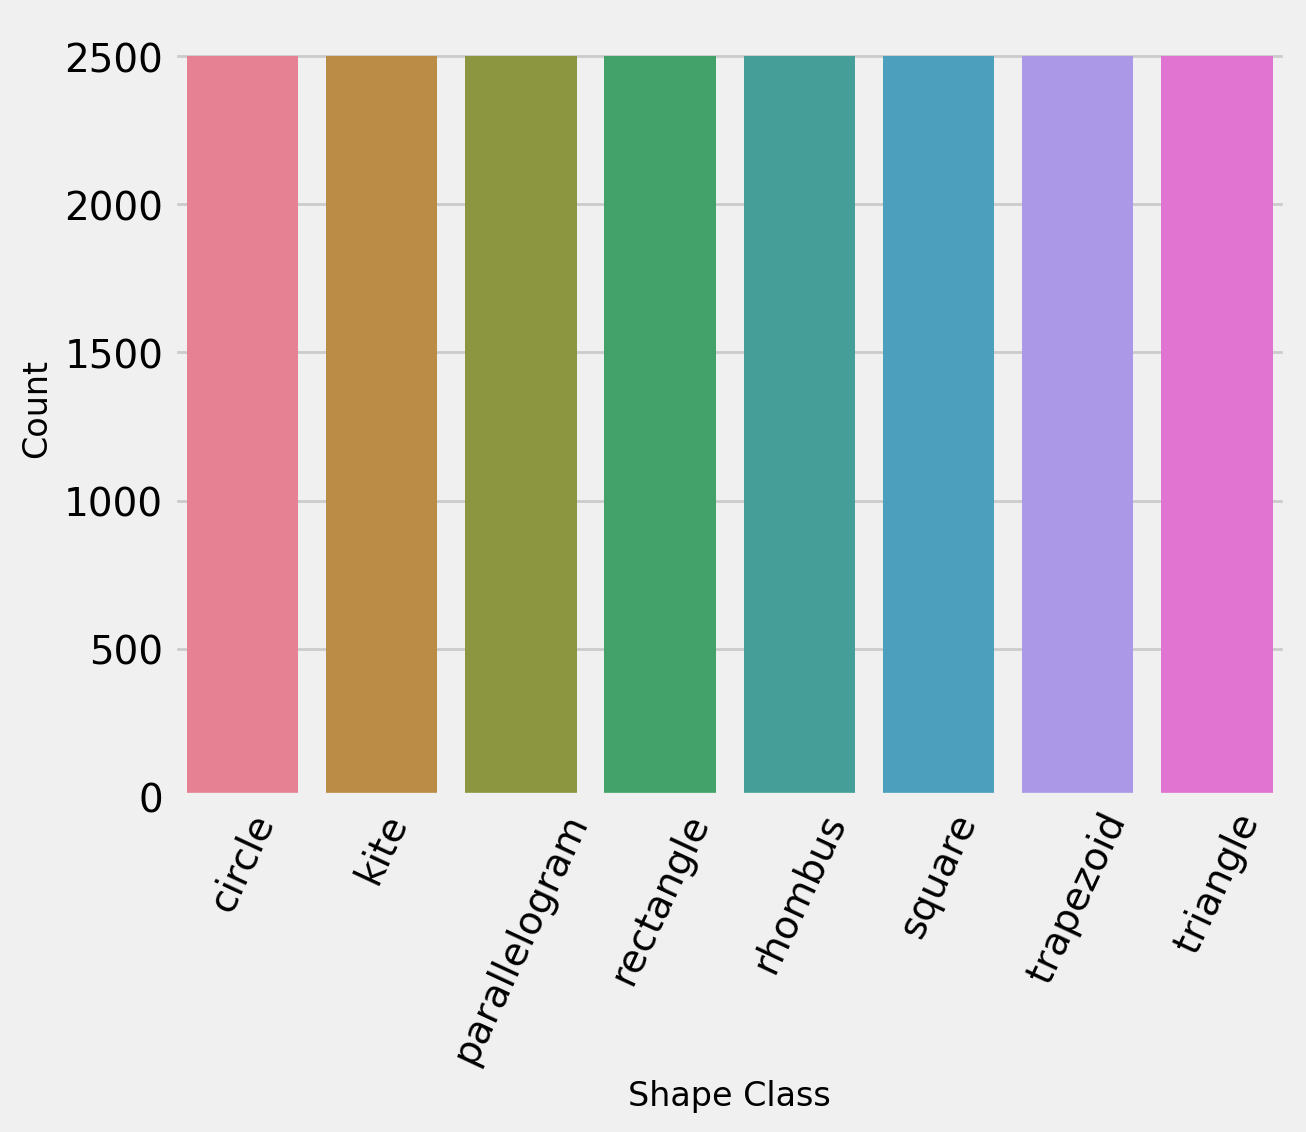

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df1 is your DataFrame and df1['label'] contains the labels
# Assuming y_resampled is a pandas Series or numpy array

# Count the occurrences of each class
class_distribution = pd.Series(df1['label']).value_counts()

# Dictionary to map indices to names
label_mapping = {
    0: 'circle',
    1: 'kite',
    2: 'parallelogram',
    3: 'rectangle',
    4: 'rhombus',
    5: 'square',
    6: 'trapezoid',
    7: 'triangle'
}

# Convert the indices to names using the dictionary
class_names = class_distribution.index.map(label_mapping)
plt.figure(dpi=200)


palette = sns.color_palette("husl", len(class_names))

# Create a bar plot
sns.barplot(x=class_names, y=class_distribution.values,palette=palette)

# Adding title and labels
# plt.title('Class Distribution after SMOTE Resampling')
plt.xlabel("Shape Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=65)

# Show the plot
plt.show()


In [33]:
x=df1.drop(['label'],axis=1)
y=df1['label']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2,random_state=0,shuffle=True)


## With Proposed

In [57]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
RF=RandomForestClassifier(max_depth=18, random_state=0,n_estimators=16)
rfPre1=RF.fit(x, y).predict_proba(x)
rf=pd.DataFrame(rfPre1)

RF


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rf,y,test_size = 0.2,random_state=0,shuffle=True)
# result.columns=['1','2','3','4']

In [ ]:
# result.to_csv('/content/drive/MyDrive/childfeaturefused.csv',index=False)

In [64]:
import lightgbm as lgb
print("LGB")
clf = lgb.LGBMClassifier(n_estimators=40)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',accuracy_score(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf=lgb.LGBMClassifier(n_estimators=40)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LGB
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 8
[LightGBM] [Info] Start training from score -2.082948
[LightGBM] [Info] Start training from score -2.064553
[LightGBM] [Info] Start training from score -2.089492
[LightGBM] [Info] Start training from score -2.077943
[LightGBM] [Info] Start training from score -2.077444
[LightGBM] [Info] Start training from score -2.074454
[LightGBM] [Info] Start training from score -2.090502
[LightGBM] [Info] Start training from score -2.078442
Training time: 1.6042003631591797s
error rate: 0.020000000000000018
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       507
           1       0.97      0.98      0.98       470
           2       0.98      0.98      0.98  

array([[498,   0,   0,   0,   5,   1,   2,   1],
       [  1, 461,   2,   0,   3,   1,   0,   2],
       [  3,   1, 509,   0,   2,   0,   3,   2],
       [  0,   0,   1, 495,   0,   1,   0,   0],
       [  4,   2,   0,   0, 488,   1,   1,   0],
       [  4,   4,   1,   0,   1, 478,   0,   2],
       [  4,   2,   1,   2,   2,   0, 509,   2],
       [  2,   5,   3,   0,   3,   2,   1, 482]])

In [65]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.08686137199401855s
accuracy score 0.9845
error rate: 0.015499999999999958
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       507
           1       0.96      0.99      0.98       470
           2       0.99      0.99      0.99       520
           3       1.00      1.00      1.00       497
           4       0.97      0.99      0.98       496
           5       0.99      0.98      0.99       490
           6       0.99      0.98      0.98       522
           7       0.99      0.98      0.98       498

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

0.9821 accuracy with a standard deviation of 0.0027


array([[495,   0,   2,   0,   5,   1,   2,   2],
       [  1, 465,   1,   0,   2,   1,   0,   0],
       [  3,   2, 513,   0,   1,   0,   1,   0],
       [  0,   0,   0, 497,   0,   0,   0,   0],
       [  3,   1,   0,   0, 490,   1,   1,   0],
       [  0,   4,   2,   0,   1, 480,   0,   3],
       [  3,   4,   0,   0,   2,   0, 511,   2],
       [  0,   7,   0,   0,   2,   1,   1, 487]])

In [66]:
from sklearn.linear_model import LogisticRegression
print("LR")
clf=LogisticRegression(max_iter=1)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
kf = KFold(n_splits=10, shuffle=True)
clf=LogisticRegression(max_iter=1)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LR
Training time: 0.09969735145568848s
error rate: 0.026499999999999968
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       507
           1       0.90      1.00      0.95       470
           2       1.00      0.95      0.98       520
           3       1.00      1.00      1.00       497
           4       0.95      0.99      0.97       496
           5       0.99      0.98      0.98       490
           6       1.00      0.96      0.98       522
           7       0.99      0.96      0.98       498

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

accuracy score 0.97
0.9778 accuracy with a standard deviation of 0.0040


array([[490,   4,   0,   0,   9,   1,   1,   2],
       [  0, 469,   0,   0,   1,   0,   0,   0],
       [  7,  11, 495,   0,   6,   0,   1,   0],
       [  0,   0,   0, 495,   1,   1,   0,   0],
       [  2,   5,   0,   0, 489,   0,   0,   0],
       [  1,   7,   0,   0,   3, 478,   0,   1],
       [  5,  12,   0,   2,   2,   0, 499,   2],
       [  1,  14,   0,   0,   2,   2,   0, 479]])

In [70]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf=RandomForestClassifier(max_depth=5, random_state=0,n_estimators=6)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',accuracy_score(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf=RandomForestClassifier(max_depth=5, random_state=0,n_estimators=6)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 0.22354722023010254s
error rate: 0.03225
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       507
           1       0.97      0.97      0.97       470
           2       0.99      0.96      0.98       520
           3       0.99      0.99      0.99       497
           4       0.99      0.95      0.97       496
           5       0.98      0.95      0.97       490
           6       0.87      0.99      0.92       522
           7       0.99      0.96      0.98       498

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

accuracy score 0.96775
0.9637 accuracy with a standard deviation of 0.0047


array([[490,   0,   1,   0,   3,   1,  12,   0],
       [  1, 457,   0,   0,   1,   0,  10,   1],
       [  2,   2, 499,   2,   1,   2,  12,   0],
       [  0,   0,   0, 492,   0,   0,   5,   0],
       [  5,   3,   0,   1, 473,   2,  11,   1],
       [  1,   2,   1,   0,   0, 467,  18,   1],
       [  0,   2,   1,   1,   1,   1, 515,   1],
       [  1,   4,   1,   0,   0,   2,  12, 478]])

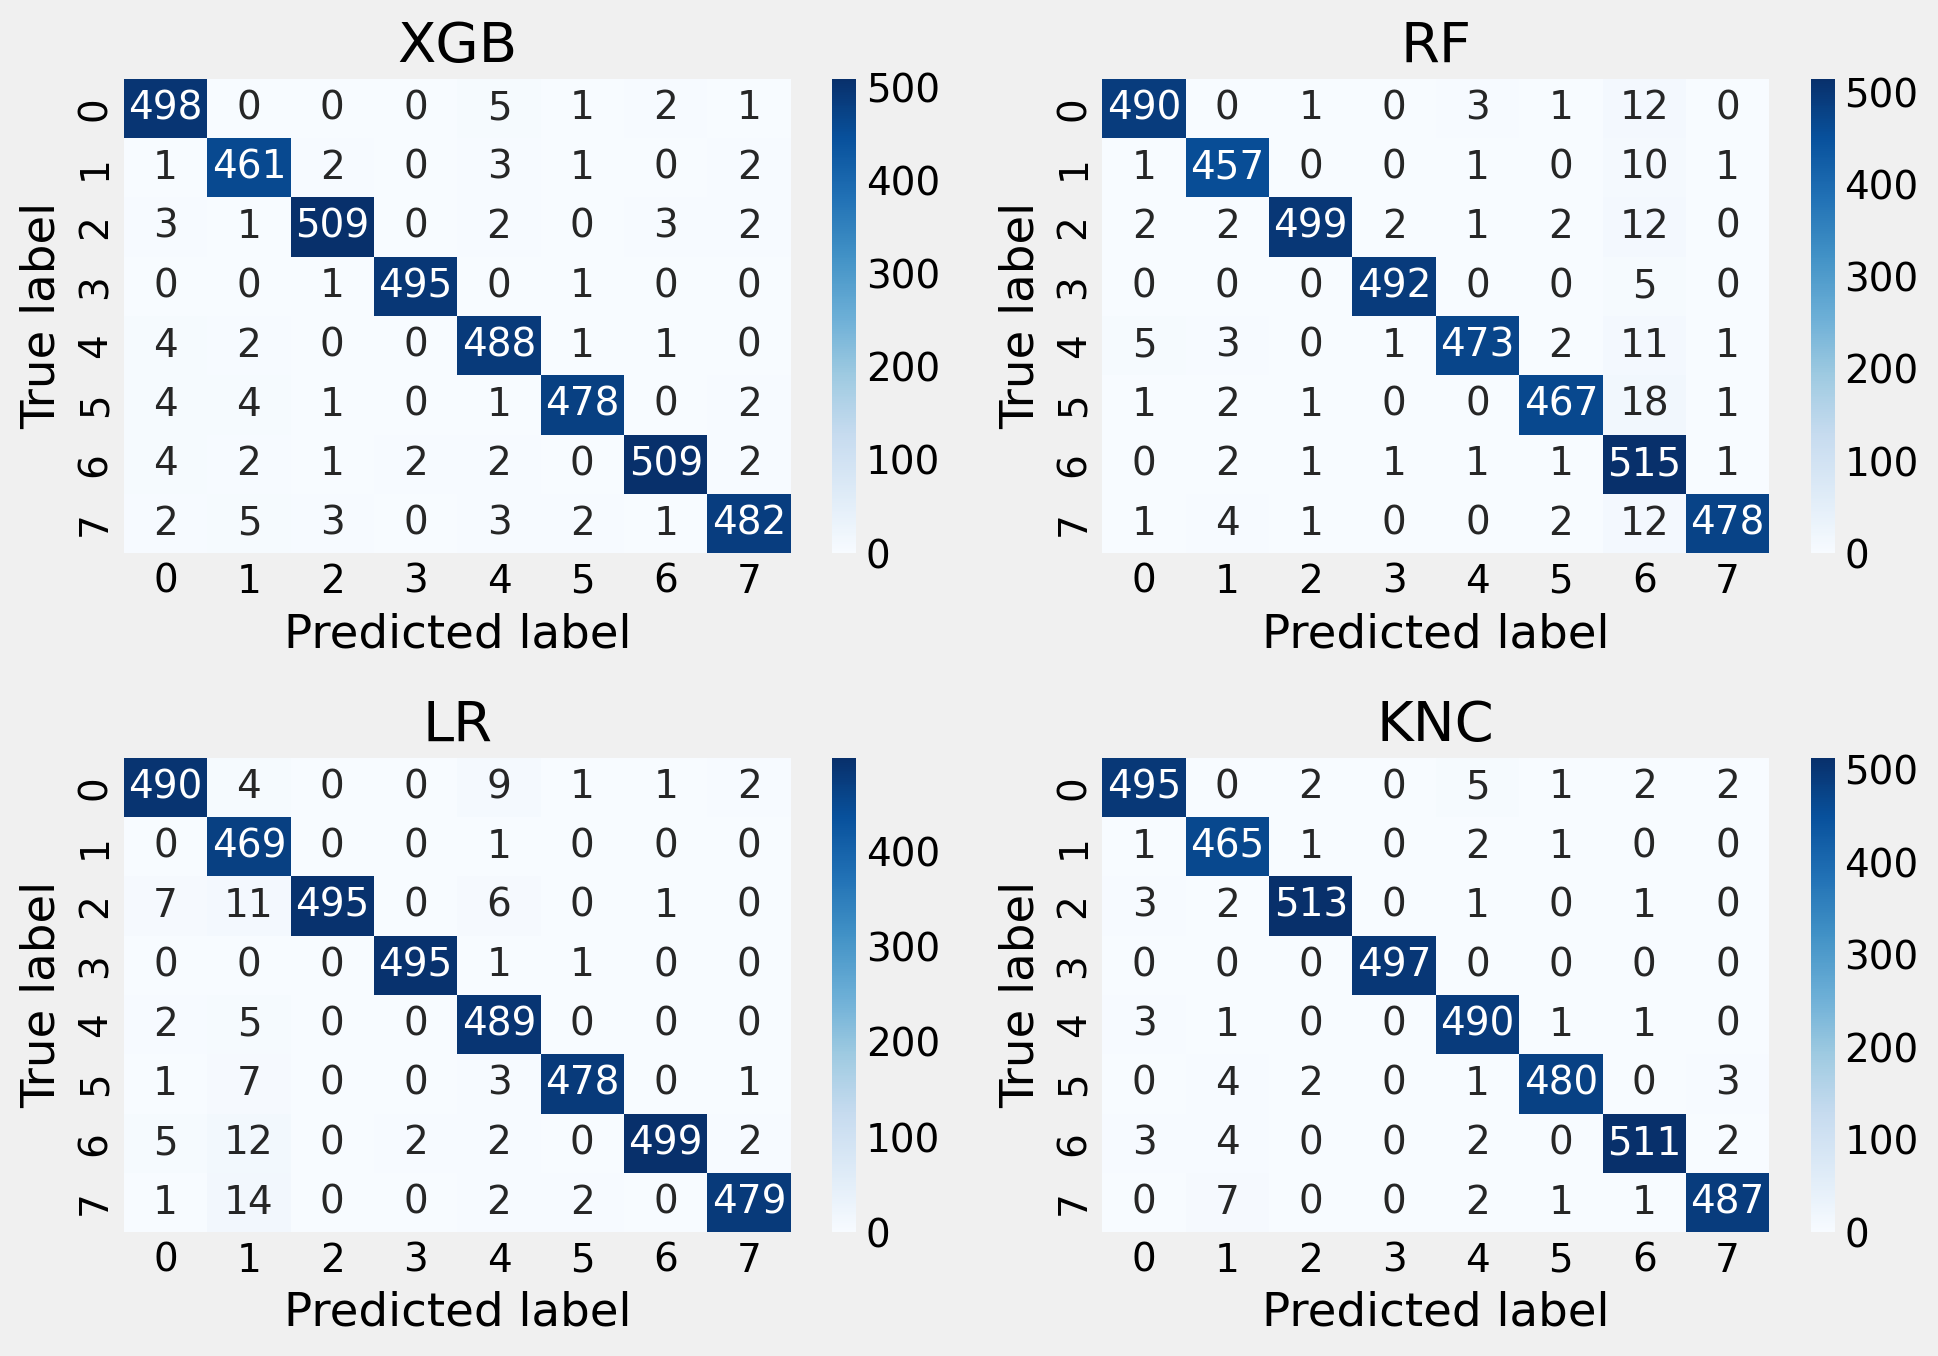

In [72]:
array1=[[498,   0,   0,   0,   5,   1,   2,   1],
       [  1, 461,   2,   0,   3,   1,   0,   2],
       [  3,   1, 509,   0,   2,   0,   3,   2],
       [  0,   0,   1, 495,   0,   1,   0,   0],
       [  4,   2,   0,   0, 488,   1,   1,   0],
       [  4,   4,   1,   0,   1, 478,   0,   2],
       [  4,   2,   1,   2,   2,   0, 509,   2],
       [  2,   5,   3,   0,   3,   2,   1, 482]]

array2=[[490,   0,   1,   0,   3,   1,  12,   0],
       [  1, 457,   0,   0,   1,   0,  10,   1],
       [  2,   2, 499,   2,   1,   2,  12,   0],
       [  0,   0,   0, 492,   0,   0,   5,   0],
       [  5,   3,   0,   1, 473,   2,  11,   1],
       [  1,   2,   1,   0,   0, 467,  18,   1],
       [  0,   2,   1,   1,   1,   1, 515,   1],
       [  1,   4,   1,   0,   0,   2,  12, 478]]

array3=[[490,   4,   0,   0,   9,   1,   1,   2],
       [  0, 469,   0,   0,   1,   0,   0,   0],
       [  7,  11, 495,   0,   6,   0,   1,   0],
       [  0,   0,   0, 495,   1,   1,   0,   0],
       [  2,   5,   0,   0, 489,   0,   0,   0],
       [  1,   7,   0,   0,   3, 478,   0,   1],
       [  5,  12,   0,   2,   2,   0, 499,   2],
       [  1,  14,   0,   0,   2,   2,   0, 479]]
array4=[[495,   0,   2,   0,   5,   1,   2,   2],
       [  1, 465,   1,   0,   2,   1,   0,   0],
       [  3,   2, 513,   0,   1,   0,   1,   0],
       [  0,   0,   0, 497,   0,   0,   0,   0],
       [  3,   1,   0,   0, 490,   1,   1,   0],
       [  0,   4,   2,   0,   1, 480,   0,   3],
       [  3,   4,   0,   0,   2,   0, 511,   2],
       [  0,   7,   0,   0,   2,   1,   1, 487]]

# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7),dpi=200)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2, array3, array4]
titles = ['XGB'  ,'RF',   'LR',   'KNC' ]

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
# axes.flat[-1].axis('off')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
# Display the figure
# plt.savefig('froncm.pdf')
plt.show()

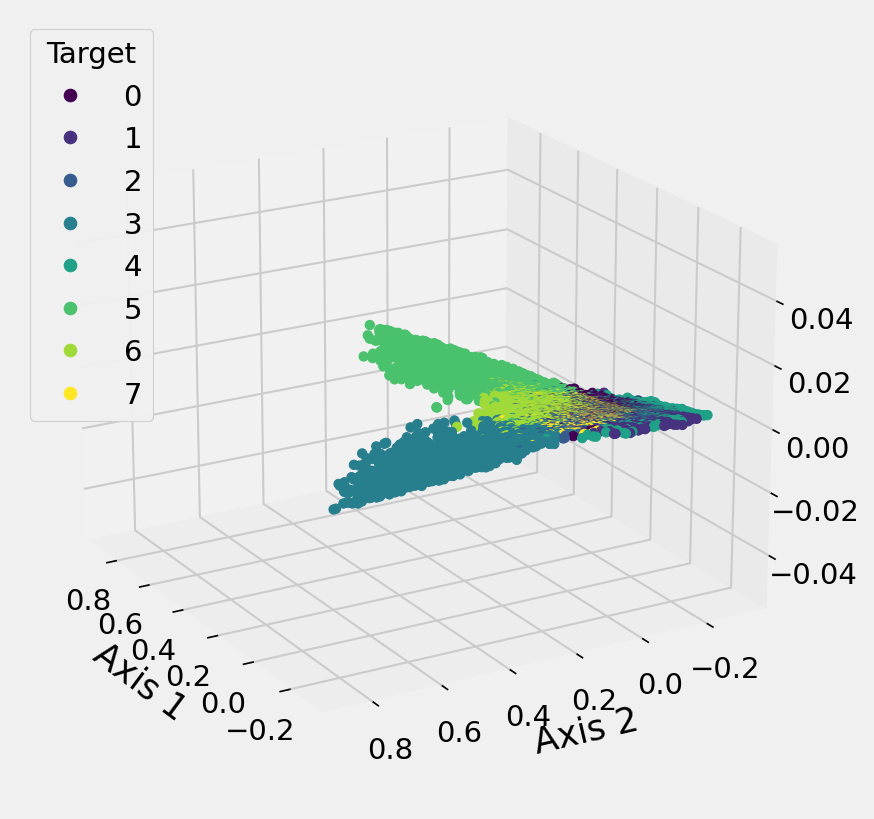

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(rf)

import matplotlib.pyplot as plt
df2=pd.DataFrame(X_train_pca,columns=['Axis 1','Axis 2'])
threedee = plt.figure(figsize=(10, 6.5), dpi=150).add_subplot(projection='3d')
import numpy as np
colors = np.random.rand(276625)
scatter= threedee.scatter( df2['Axis 2'],df2['Axis 1'],c=y, alpha=1.0, marker=r'o')
threedee.set_xlabel('Axis 1')
threedee.set_ylabel('Axis 2')
# threedee.set_zlabel('Axis 3')
legend1 = threedee.legend(*scatter.legend_elements(),
                    loc="upper left", title="Target")
threedee.add_artist(legend1)
threedee.view_init(azim=150, elev=20)
# threedee.grid(True)
# plt.savefig('pca_gen_data.pdf')

plt.show()